# Reds Baseball Analytics 2024 Hackathon

by Adi Krish, Prasheeth Venkat, Vrishank Gosh

## Introduction

TODO: Basic Intro

**Notice: I have made several assumptions regarding my understanding and approach to this assessment:**

- TODO: List assumptions

## Data Ingestion

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class ProcessPitcherData:
    def load_pitcher_data(self, pitcher_data_file):
        # load pitcher data
        pitcher_data = pd.read_csv(pitcher_data_file)
        return pitcher_data

In [3]:
# file path for pitcher data
pitcher_data_file = 'fangraphs_season_level.csv'

# create instance of ProcessPitcherData class
process_pitcher_data = ProcessPitcherData()

# load pitcher data
pitcher_data = process_pitcher_data.load_pitcher_data(pitcher_data_file)

pitcher_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus
0,18,491703,NeftalÃ­ Feliz,Neftali Feliz,R,2021,33,- - -,RP,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.316418,95.123881,95.873134
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,103.100000,NaN,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222
2,1159,461865,Andrew Romine,Andrew Romine,R,2021,35,CHC,RP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.925000,108.425000,99.200000
3,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594
4,1247,493603,Adam Ottavino,Adam Ottavino,R,2021,35,BOS,RP,69,...,66.583333,NaN,NaN,NaN,NaN,NaN,NaN,116.269527,94.625394,102.238617


## Data Exploration

In [4]:
# import 
pitcher_delta_df = pd.read_csv('pitcher_delta_grade.csv')

# Drop name column
pitcher_delta_df = pitcher_delta_df.drop(columns=['player_name'])

pitcher_delta_df.head()

,delta_diff,delta_avg,MLBAMID
0,0.012000,-0.085667,663897
1,0.132329,-0.080487,596112
2,0.010583,-0.073286,641525
3,0.054542,-0.072396,600986
4,0.111389,-0.064529,570731


In [5]:
# merge dataframes
pitcher_data = pd.merge(pitcher_data, pitcher_delta_df, on='MLBAMID')

pitcher_data.head()

,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,...,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,delta_diff,delta_avg
0,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,RP,3,...,NaN,NaN,NaN,NaN,NaN,86.285556,94.884444,95.112222,0.037060,0.008007
1,1157,488984,Tommy Hunter,Tommy Hunter,R,2022,35,NYM,RP,18,...,NaN,NaN,NaN,NaN,NaN,95.934758,108.332194,101.498006,0.037060,0.008007
2,1157,488984,Tommy Hunter,Tommy Hunter,R,2023,36,NYM,RP,14,...,NaN,NaN,NaN,NaN,NaN,82.804360,105.339510,100.527793,0.037060,0.008007
3,1157,488984,Tommy Hunter,Tommy Hunter,R,2021,34,NYM,SP,1,...,NaN,NaN,NaN,NaN,NaN,96.164706,114.752941,107.764706,0.037060,0.008007
4,1246,456713,Matt Bush,Matt Bush,R,2021,35,TEX,RP,4,...,NaN,NaN,NaN,NaN,NaN,124.852174,98.340580,102.611594,0.000057,0.014121


In [6]:
print(f"Pitcher data shape: {pitcher_data.shape}")
 
print(f" Number of starting pitchers{pitcher_data[pitcher_data['Role'] == 'SP'].shape}")

print(f" Number of relief pitchers{pitcher_data[pitcher_data['Role'] == 'RP'].shape}")

Pitcher data shape: (2505, 310)
 Number of starting pitchers(947, 310)
 Number of relief pitchers(1558, 310)


## Data Processing

In [7]:
# Filter data to 2023 season
pitcher_data = pitcher_data[pitcher_data['Season'] == 2023]

# Filter to only include number of innings pitched
pitcher_data = pitcher_data[pitcher_data['IP'] > 50]

print(f"Pitcher data shape: {pitcher_data.shape}")

Pitcher data shape: (331, 310)


In [8]:
filtered_pitcher_data = pitcher_data[['Name','ERA', 'K_pct', 'WHIP', 'delta_diff', 'delta_avg', 'Season', 'Role', 'IP']].copy()

filtered_pitcher_data.head()


,Name,ERA,K_pct,WHIP,delta_diff,delta_avg,Season,Role,IP
10,Adam Ottavino,3.210809,0.2375,1.216216,0.069955,-0.044033,2023,RP,61.2
15,Zack Greinke,5.015267,0.1621,1.267176,0.006770,0.006281,2023,SP,131.0
36,Ryan Brasier,3.016758,0.2353,1.022346,0.146894,0.054887,2023,RP,59.2
42,JosÃ© Cisnero,5.308992,0.2622,1.483147,0.008057,0.020210,2023,RP,59.1
45,Craig Kimbrel,3.260870,0.3381,1.043478,0.093141,-0.052338,2023,RP,69.0


In [9]:
# Drop any rows with missing data
filtered_pitcher_data = filtered_pitcher_data.dropna()

print(f"Pitcher data shape: {filtered_pitcher_data.shape}")

filtered_pitcher_data.head()

Pitcher data shape: (331, 9)


,Name,ERA,K_pct,WHIP,delta_diff,delta_avg,Season,Role,IP
10,Adam Ottavino,3.210809,0.2375,1.216216,0.069955,-0.044033,2023,RP,61.2
15,Zack Greinke,5.015267,0.1621,1.267176,0.006770,0.006281,2023,SP,131.0
36,Ryan Brasier,3.016758,0.2353,1.022346,0.146894,0.054887,2023,RP,59.2
42,JosÃ© Cisnero,5.308992,0.2622,1.483147,0.008057,0.020210,2023,RP,59.1
45,Craig Kimbrel,3.260870,0.3381,1.043478,0.093141,-0.052338,2023,RP,69.0


In [10]:
# Spit to starting and relief pitchers
sp_pitchers = filtered_pitcher_data[filtered_pitcher_data['Role'] == 'SP'].copy()

rp_pitchers = filtered_pitcher_data[filtered_pitcher_data['Role'] == 'RP'].copy()

print(f" Number of starting pitchers{sp_pitchers.shape}")

print(f" Number of relief pitchers{rp_pitchers.shape}")

 Number of starting pitchers(176, 9)
 Number of relief pitchers(155, 9)


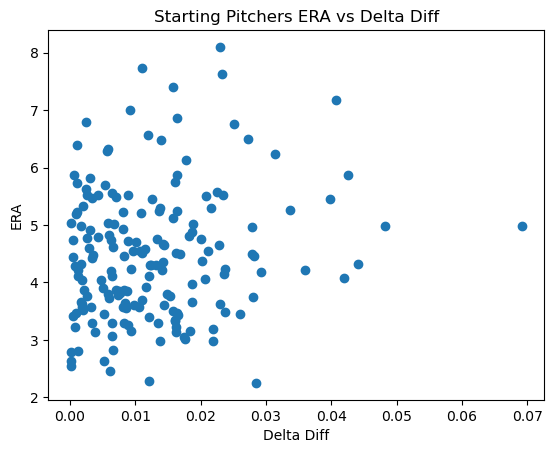

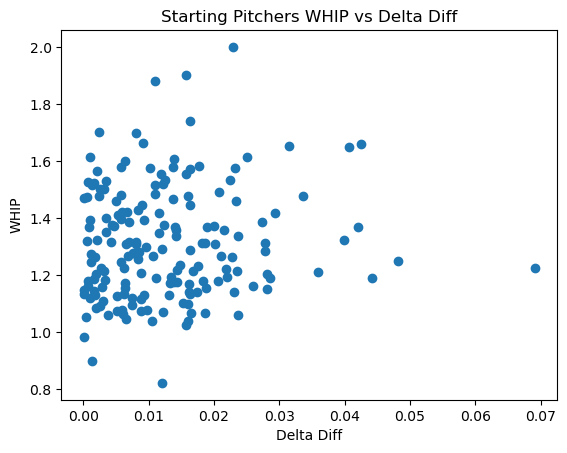

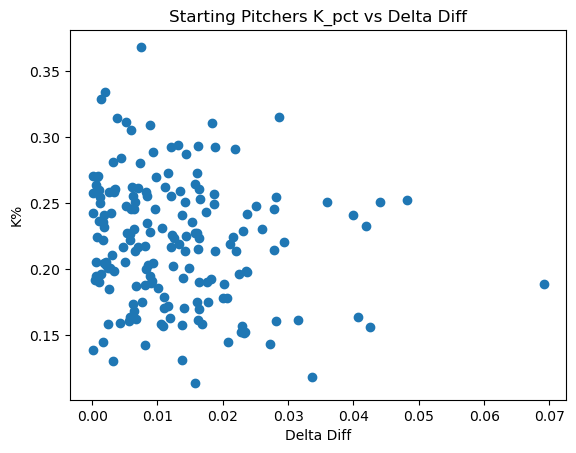

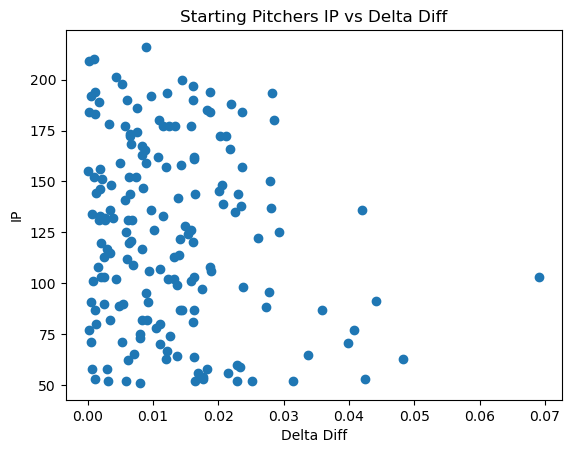

In [11]:
# Compare Starting pitchers ERA vs Delta Diff
plt.scatter(sp_pitchers['delta_diff'], sp_pitchers['ERA'] )
plt.title('Starting Pitchers ERA vs Delta Diff')
plt.xlabel('Delta Diff')
plt.ylabel('ERA')
plt.show()

# Compare Starting pitchers WHIP vs Delta Diff
plt.scatter(sp_pitchers['delta_diff'], sp_pitchers['WHIP'])
plt.title('Starting Pitchers WHIP vs Delta Diff')
plt.xlabel('Delta Diff')
plt.ylabel('WHIP')
plt.show()

# Compare Starting pitchers K_pct vs Delta Diff
plt.scatter(sp_pitchers['delta_diff'], sp_pitchers['K_pct'] )
plt.title('Starting Pitchers K_pct vs Delta Diff')
plt.xlabel('Delta Diff')
plt.ylabel('K%')
plt.show()

# Compare Starting pitchers IP vs Delta Diff
plt.scatter(sp_pitchers['delta_diff'], sp_pitchers['IP'] )
plt.title('Starting Pitchers IP vs Delta Diff')
plt.xlabel('Delta Diff')
plt.ylabel('IP')
plt.show()


In [14]:
# Find right outliers for starting pitchers
sp_right_outliers = sp_pitchers[sp_pitchers['ERA'] < 5]

sp_right_outliers = sp_right_outliers[sp_right_outliers['delta_diff'] > 0.0325]

sp_right_outliers

,Name,ERA,K_pct,WHIP,delta_diff,delta_avg,Season,Role,IP
741,Tony Gonsolin,4.980583,0.1885,1.223301,0.069117,0.031552,2023,SP,103.0
1570,Reese Olson,4.319998,0.2507,1.189090,0.044119,0.017490,2023,SP,91.2
1828,Andrew Heaney,4.082917,0.2322,1.368289,0.041986,0.021455,2023,SP,136.2
1893,Nestor Cortes,4.973687,0.2519,1.247369,0.048180,0.014208,2023,SP,63.1
2433,Bryan Woo,4.209124,0.2507,1.209125,0.035925,0.011314,2023,SP,87.2


## Data Analysis and Model Building

In [ ]:
features = sp_pitchers[['ERA', 'K_pct', 'WHIP', 'delta_diff', 'delta_avg']]

# Standardize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Create a kmeans model on our data, using k clusters. Random_state helps ensure that the algorithm returns the same results each time.
model = KMeans(n_clusters=4, random_state=42)

# Use the fit method to fit the model to the features from the dataframe
sp_pitchers['cluster'] = model.fit_predict(scaled_features)

# Create a scatter plot of the data, coloring by cluster
plt.scatter(sp_pitchers['ERA'], sp_pitchers['delta_diff'], c=sp_pitchers['cluster'], cmap='viridis')
plt.xlabel('ERA')
plt.ylabel('Delta Differece')

# Display the plot
plt.show()

### Cluster Analysis

In [ ]:
# Print value counts for each cluster
print(sp_pitchers['cluster'].value_counts())

In [ ]:
sp_pitchers[['Name', 'cluster']].head()

In [ ]:
ohtani_data = sp_pitchers[sp_pitchers['Name'].str.contains('Ohtani')]
ohtani_data

In [ ]:
gerrit_cole_data = sp_pitchers[sp_pitchers['Name'].str.contains('Gerrit')]

gerrit_cole_data

In [ ]:
blake_snell_data = sp_pitchers[sp_pitchers['Name'].str.contains('Blake Snell')]
blake_snell_data

#### Explore Clusters

In [ ]:
# Explore Cluster 0
cluster_0 = sp_pitchers[sp_pitchers['cluster'] == 0]
cluster_0.describe()

In [ ]:
cluster_0.sort_values(by='ERA', ascending=True).head()

In [ ]:
cluster_1 = sp_pitchers[sp_pitchers['cluster'] == 1]
cluster_1.describe()

In [ ]:
cluster_1.sort_values(by='ERA', ascending=True).head()

In [ ]:
# Explore Cluster 2
cluster_2 = sp_pitchers[sp_pitchers['cluster'] == 2]
cluster_2.describe()

In [ ]:
cluster_2.sort_values(by='ERA', ascending=True).head()

In [ ]:
# Explore Cluster 3
cluster_3 = sp_pitchers[sp_pitchers['cluster'] == 3]
cluster_3.describe()

In [ ]:
# Sort by ERA
cluster_3.sort_values(by='ERA', ascending=True).head()